# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t

# print "OpenCV Version : %s " % cv2.__version__

# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

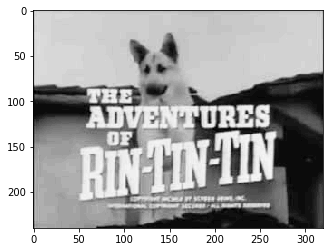

In [6]:
min_gray = rintin_gray.min()
max_gray = rintin_gray.max()
plt.imshow(rintin_gray, cmap="Greys_r", vmin=(min_gray), vmax=(max_gray))

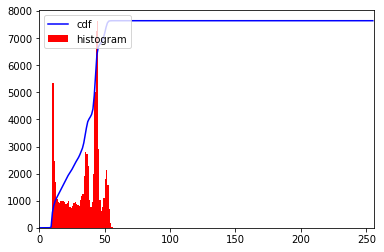

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

### Histograms Equalization in OpenCV
#### Site usado para consulta :
http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html


In [8]:
rintin_equ = cv2.equalizeHist(rintin_gray)

In [9]:
hist_equ, bins = np.histogram(rintin_equ.flatten(),256,[0,256])

cdf_equ = hist_equ.cumsum()

cdf_equ_normalized = cdf_equ * hist_equ.max()/ cdf_equ.max()

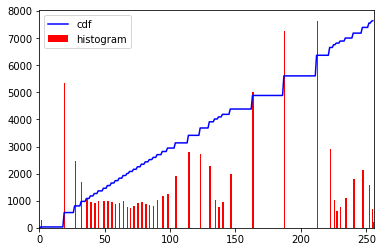

In [10]:
plt.plot(cdf_equ_normalized, color = 'b')
plt.hist(rintin_equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

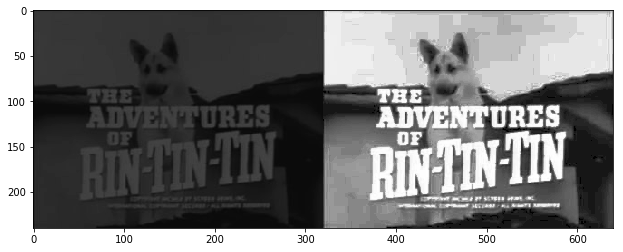

In [11]:
imgs = np.hstack((rintin_gray,rintin_equ)) #stacking images side-by-side
fig, ax = plt.subplots(figsize=(18, 4))
plt.imshow(imgs, cmap="Greys_r", vmin=(0), vmax=(255))

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


### Item 1

In [12]:
hall = cv2.imread("hall_box_battery1.jpg")
hall = cv2.cvtColor(hall, cv2.COLOR_BGR2RGB)
hall_red = hall[:,:,0]
hall_blue = hall[:,:,2]


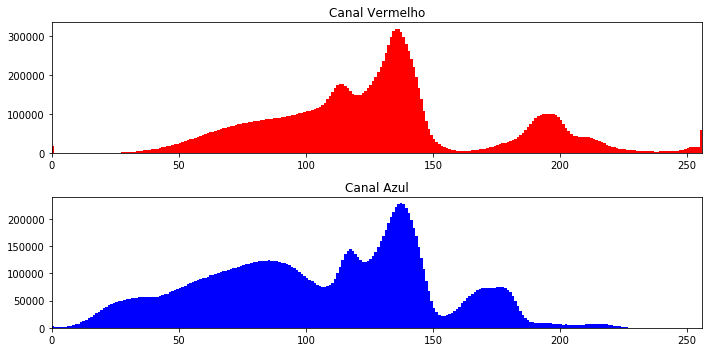

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(211)
plt.title('Canal Vermelho')
plt.hist(hall_red.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

plt.subplot(212)
plt.title('Canal Azul')
plt.hist(hall_blue.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])

plt.tight_layout()
plt.show()

Analizando o histograma do canal vermelho podemos ver uma quantidade de pixels de alta intencidade que deve ser a caixa vermelha. 

Quando comparados com o histograma do canal azul não vemos essa mesma quantidade de pixels de alta intensidade o que confirma a existencia de uma cor de alta intensidade na foto. Alem disso podemos ver mais pixels de baixa intencidade o que representa a cor azul.

### Item 2

In [ ]:
# halls = np.hstack((hall_red,hall_blue)) #stacking images side-by-side
# fig, ax = plt.subplots(figsize=(18, 4))

def detectaVermelho(pixel):
    if pixel[0] > 160 and pixel[1] < 140 and pixel[2] < 140:
        return [255,255,255]
    else:
        return [0,0,0]

In [ ]:
hall_mask = []
for i in range(len(hall)):
    pixel = []
    for j in range(len(hall[i])):
        pixel.append(detectaVermelho(hall[i][j]))
    hall_mask.append(pixel)

In [ ]:
img_numpy = np.asarray(hall_mask)
img_numpy = img_numpy.astype(np.uint8)

In [ ]:
plt.imshow(img_numpy, vmin=(0), vmax=(255))